In [1]:
import pandas as pd
%matplotlib inline
import numpy as np


Bad key "text.kerning_factor" on line 4 in
C:\Users\Glen\anaconda3\envs\pyvizenv_2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from pathlib import Path
csvpath = Path('../Resources/amazon.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Diff
Date,,,,,,,
2009-01-02,51.349998,54.529999,51.070000,54.360001,54.360001,7296400,3.080002
2009-01-05,55.730000,55.740002,53.029999,54.060001,54.060001,9509800,-0.300000
2009-01-06,54.549999,58.220001,53.750000,57.360001,57.360001,11080100,3.300000
2009-01-07,56.290001,56.950001,55.349998,56.200001,56.200001,7942700,-1.160000
2009-01-08,54.990002,57.320000,54.580002,57.160000,57.160000,6577900,0.959999


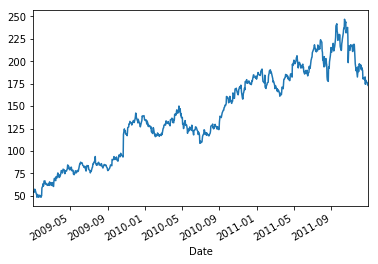

In [4]:
df.Close.plot()

In [6]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller

results=adfuller(df.Close)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('/t%s: %f' % (key,value))

ADF Statistic: -1.664892
p-value: 0.449286
Critical Values:
/t1%: -3.439041
/t5%: -2.865376
/t10%: -2.568813


# Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [7]:
# Convert to stationary data by taking the `pct_change` of the Closing prices.
df['Returns'] = df.Close.pct_change()

In [8]:
# Drop the NaNs created by the pct_change function
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Diff,Returns
Date,,,,,,,,
2009-01-05,55.730000,55.740002,53.029999,54.060001,54.060001,9509800,-0.300000,-0.005519
2009-01-06,54.549999,58.220001,53.750000,57.360001,57.360001,11080100,3.300000,0.061043
2009-01-07,56.290001,56.950001,55.349998,56.200001,56.200001,7942700,-1.160000,-0.020223
2009-01-08,54.990002,57.320000,54.580002,57.160000,57.160000,6577900,0.959999,0.017082
2009-01-09,56.919998,57.000000,54.700001,55.509998,55.509998,6684100,-1.650002,-0.028866


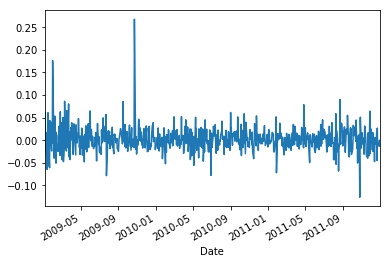

In [9]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df.Returns.plot()

### Technique 2: Applying a Diff

In [10]:
# Subtract the upward trend for the closing prices using the `diff()` function
df['Diff'] = df.Close.diff()

In [11]:
# Drop the NaNs created from the diff function
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Diff,Returns
Date,,,,,,,,
2009-01-06,54.549999,58.220001,53.750000,57.360001,57.360001,11080100,3.300000,0.061043
2009-01-07,56.290001,56.950001,55.349998,56.200001,56.200001,7942700,-1.160000,-0.020223
2009-01-08,54.990002,57.320000,54.580002,57.160000,57.160000,6577900,0.959999,0.017082
2009-01-09,56.919998,57.000000,54.700001,55.509998,55.509998,6684100,-1.650002,-0.028866
2009-01-12,54.119999,54.299999,50.869999,51.919998,51.919998,9556300,-3.590000,-0.064673


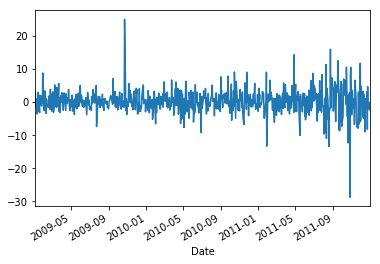

In [12]:
# Plot the 
df.Diff.plot()